# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

<Figure size 432x288 with 0 Axes>

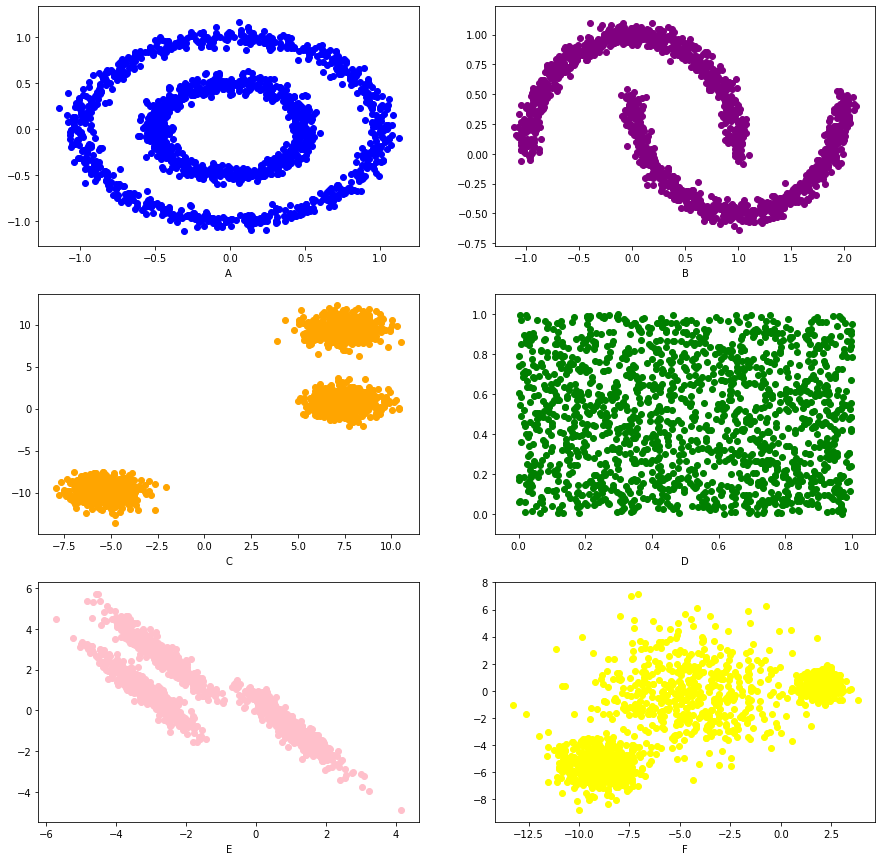

In [3]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2)

axes[0][0].scatter(A[:, 0], A[:, 1], c="blue")
axes[0][0].set_xlabel('A', labelpad = 5)

axes[0][1].scatter(B[:, 0], B[:, 1], c="purple")
axes[0][1].set_xlabel('B', labelpad = 5)

axes[1][0].scatter(C[:, 0], C[:, 1], c="orange")
axes[1][0].set_xlabel('C', labelpad = 5)

axes[1][1].scatter(D[:, 0], D[:, 1], c="green")
axes[1][1].set_xlabel('D', labelpad = 5)

axes[2][0].scatter(E[:, 0], E[:, 1], c="pink")
axes[2][0].set_xlabel('E', labelpad = 5)

axes[2][1].scatter(F[:, 0], F[:, 1], c="yellow")
axes[2][1].set_xlabel('F', labelpad = 5)

f.set_figheight(15)
f.set_figwidth(15)

plt.show()


## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

# Lösung 2.1

In [4]:
from sklearn.cluster import KMeans

In [5]:
K_Means_A=KMeans(n_jobs=-1)
K_Means_B=KMeans(n_jobs=-1)
K_Means_C=KMeans(n_jobs=-1)
K_Means_D=KMeans(n_jobs=-1)
K_Means_E=KMeans(n_jobs=-1)
K_Means_F=KMeans(n_jobs=-1)

In [6]:
#training
K_Means_A.fit(A)
K_Means_B.fit(B)
K_Means_C.fit(C)
K_Means_D.fit(D)
K_Means_E.fit(E)
K_Means_F.fit(F)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
#get cluster centers
centers_A=K_Means_A.cluster_centers_
labels_A=K_Means_A.labels_    

centers_B=K_Means_B.cluster_centers_
labels_B=K_Means_B.labels_   

centers_C=K_Means_C.cluster_centers_
labels_C=K_Means_C.labels_   

centers_D=K_Means_D.cluster_centers_
labels_D=K_Means_D.labels_   

centers_E=K_Means_E.cluster_centers_
labels_E=K_Means_E.labels_   

centers_F=K_Means_F.cluster_centers_
labels_F=K_Means_F.labels_   

<Figure size 432x288 with 0 Axes>

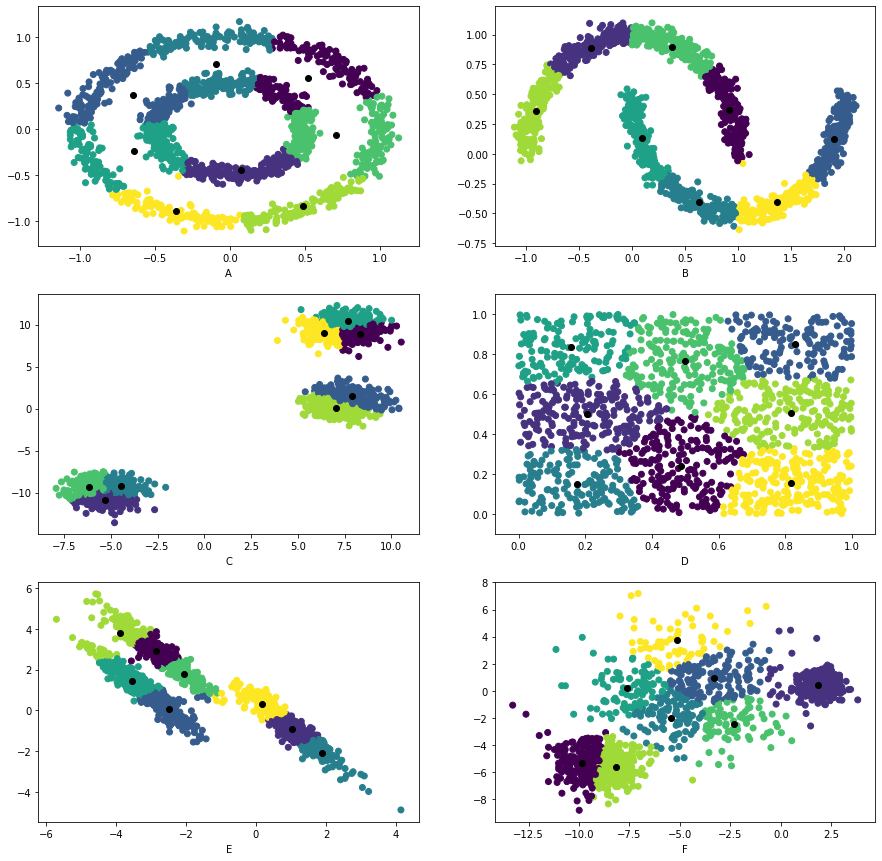

In [8]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2)

#K-Means auf A 
axes[0][0].scatter(A[:, 0], A[:, 1], c=labels_A)
axes[0][0].scatter(centers_A[:, 0], centers_A[:, 1], c="black")
axes[0][0].set_xlabel('A', labelpad = 5)

#K-Means auf B 
axes[0][1].scatter(B[:, 0], B[:, 1], c=labels_B)
axes[0][1].scatter(centers_B[:, 0], centers_B[:, 1], c="black")
axes[0][1].set_xlabel('B', labelpad = 5)

#K-Means auf C 
axes[1][0].scatter(C[:, 0], C[:, 1], c=labels_C)
axes[1][0].scatter(centers_C[:, 0], centers_C[:, 1], c="black")
axes[1][0].set_xlabel('C', labelpad = 5)

#K-Means auf D 
axes[1][1].scatter(D[:, 0], D[:, 1], c=labels_D)
axes[1][1].scatter(centers_D[:, 0], centers_D[:, 1], c="black")
axes[1][1].set_xlabel('D', labelpad = 5)

#K-Means auf E
axes[2][0].scatter(E[:, 0], E[:, 1], c=labels_E)
axes[2][0].scatter(centers_E[:, 0], centers_E[:, 1], c="black")
axes[2][0].set_xlabel('E', labelpad = 5)

#K-Means auf F 
axes[2][1].scatter(F[:, 0], F[:, 1], c=labels_F)
axes[2][1].scatter(centers_F[:, 0], centers_F[:, 1], c="black")
axes[2][1].set_xlabel('F', labelpad = 5)

f.set_figheight(15)
f.set_figwidth(15)

plt.show()

# Lösung 2.2

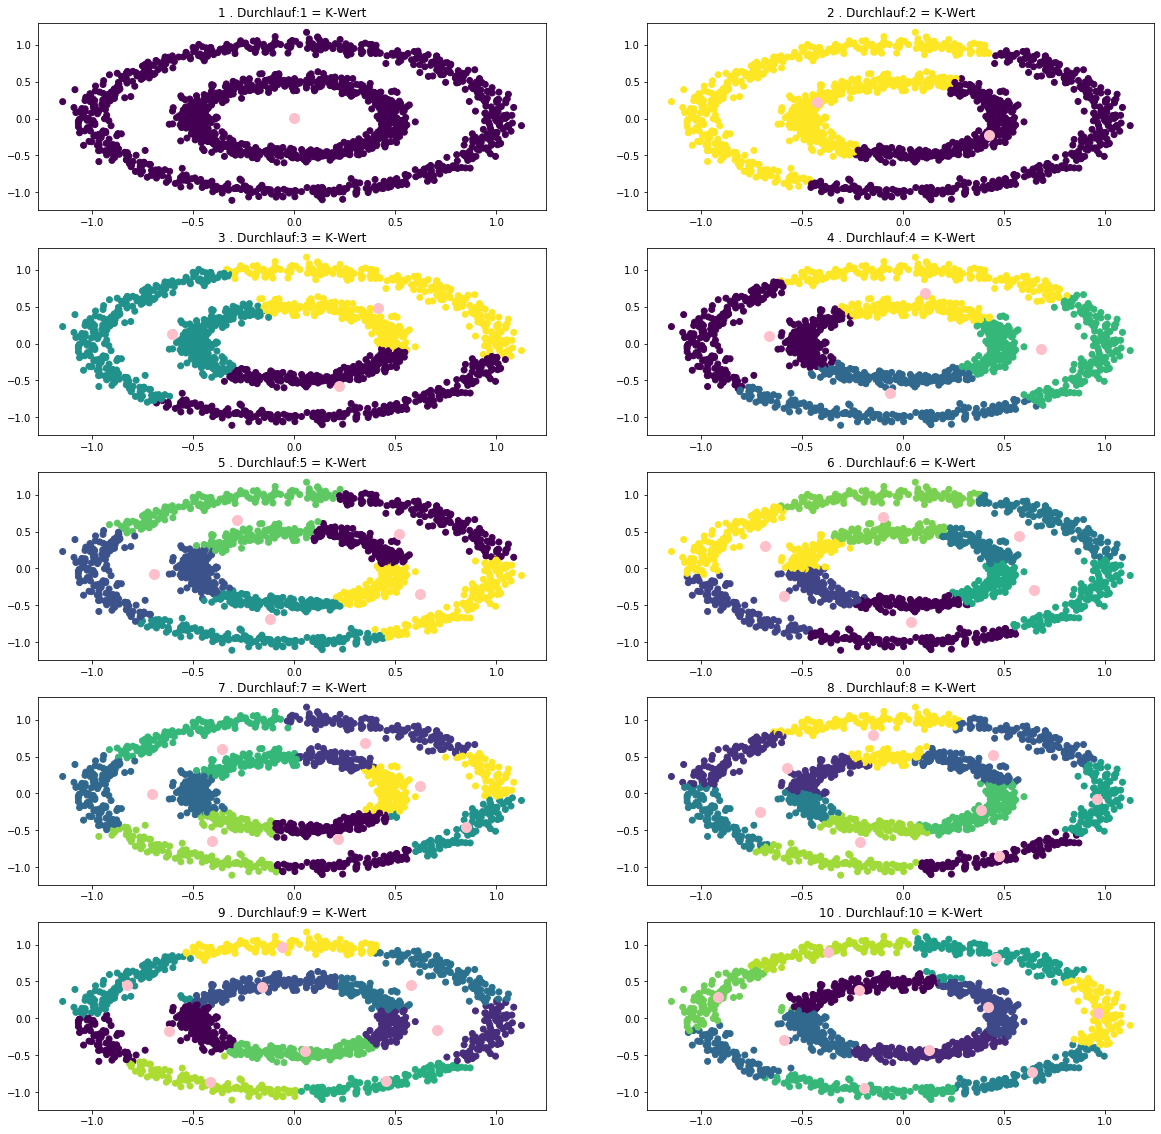

In [9]:
k_count = 1
c=d=0
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,20))
for i in range(10):
    kmeans = KMeans(n_clusters=k_count, max_iter=i+1)
    axes[c][d].title.set_text(f"{i+1} . Durchlauf:"f"{k_count} = K-Wert")
    kmeans.fit(A)
    centers_A=kmeans.cluster_centers_
    labels_A=kmeans.labels_ 
    #Ergebnis von Durchlauf printen
    axes[c][d].scatter(A[:, 0], A[:, 1], c=labels_A)
    axes[c][d].scatter(centers_A[:, 0], centers_A[:, 1], s=100, c='pink')
    d+=1
    k_count+=1
    #wenn subplot ende erreicht
    if d==2:
        c+=1
        d=0
    

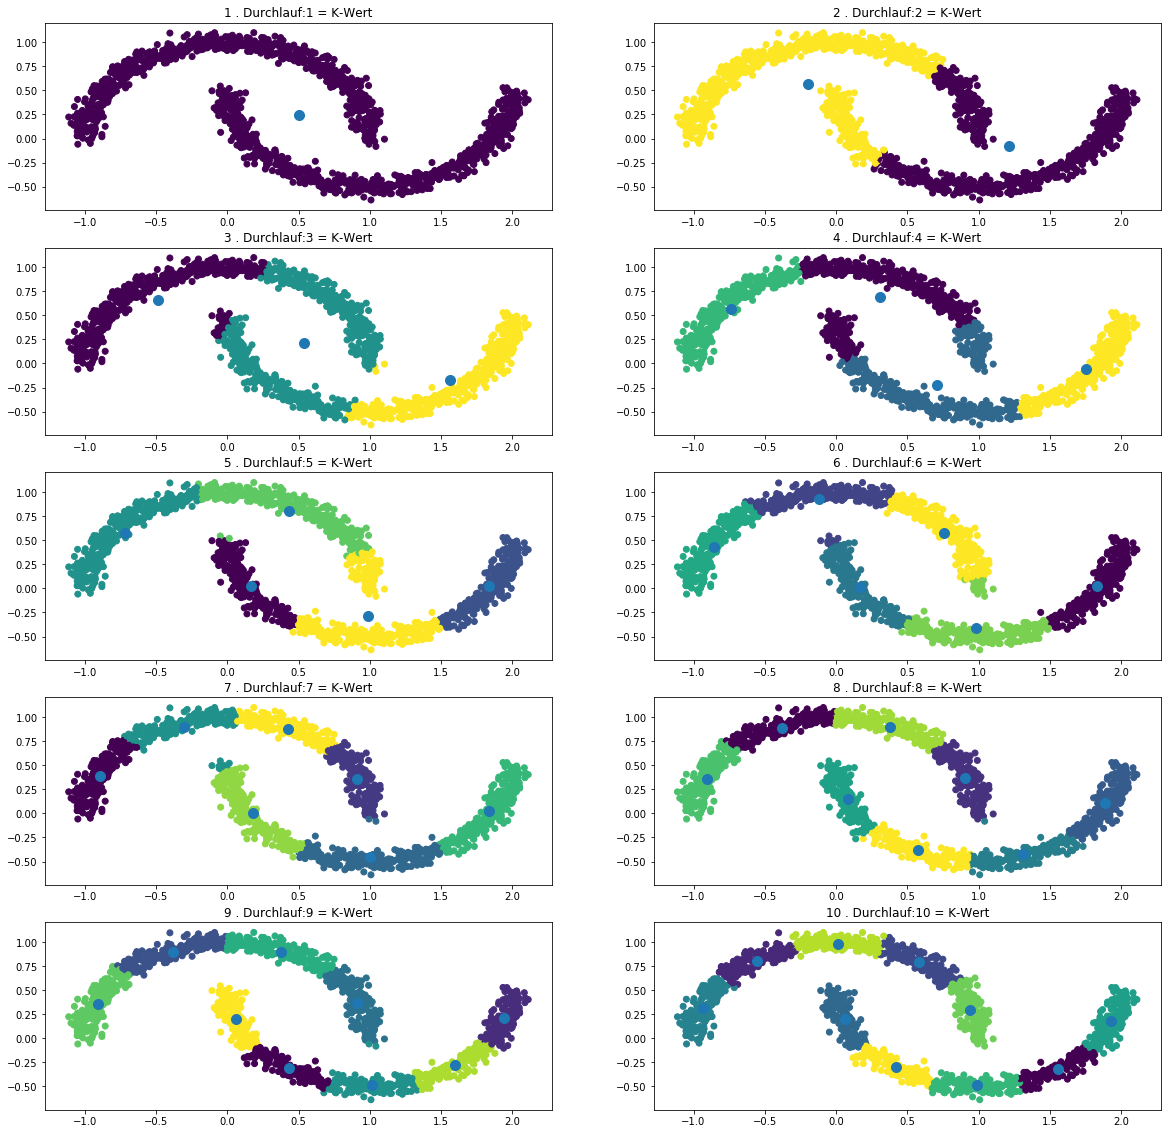

In [10]:
k_count = 1
c=d=0
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,20))
for i in range(10):
    kmeans = KMeans(n_clusters=k_count, max_iter=i+1)
    axes[c][d].title.set_text(f"{i+1} . Durchlauf:"f"{k_count} = K-Wert")
    kmeans.fit(B)
    centers_B=kmeans.cluster_centers_
    labels_B=kmeans.labels_ 
    #Ergebnis von Durchlauf printen
    axes[c][d].scatter(B[:, 0], B[:, 1], c=labels_B)
    axes[c][d].scatter(centers_B[:, 0], centers_B[:, 1], s=100)
    d+=1
    k_count+=1
    #wenn subplot ende erreicht
    if d==2:
        c+=1
        d=0

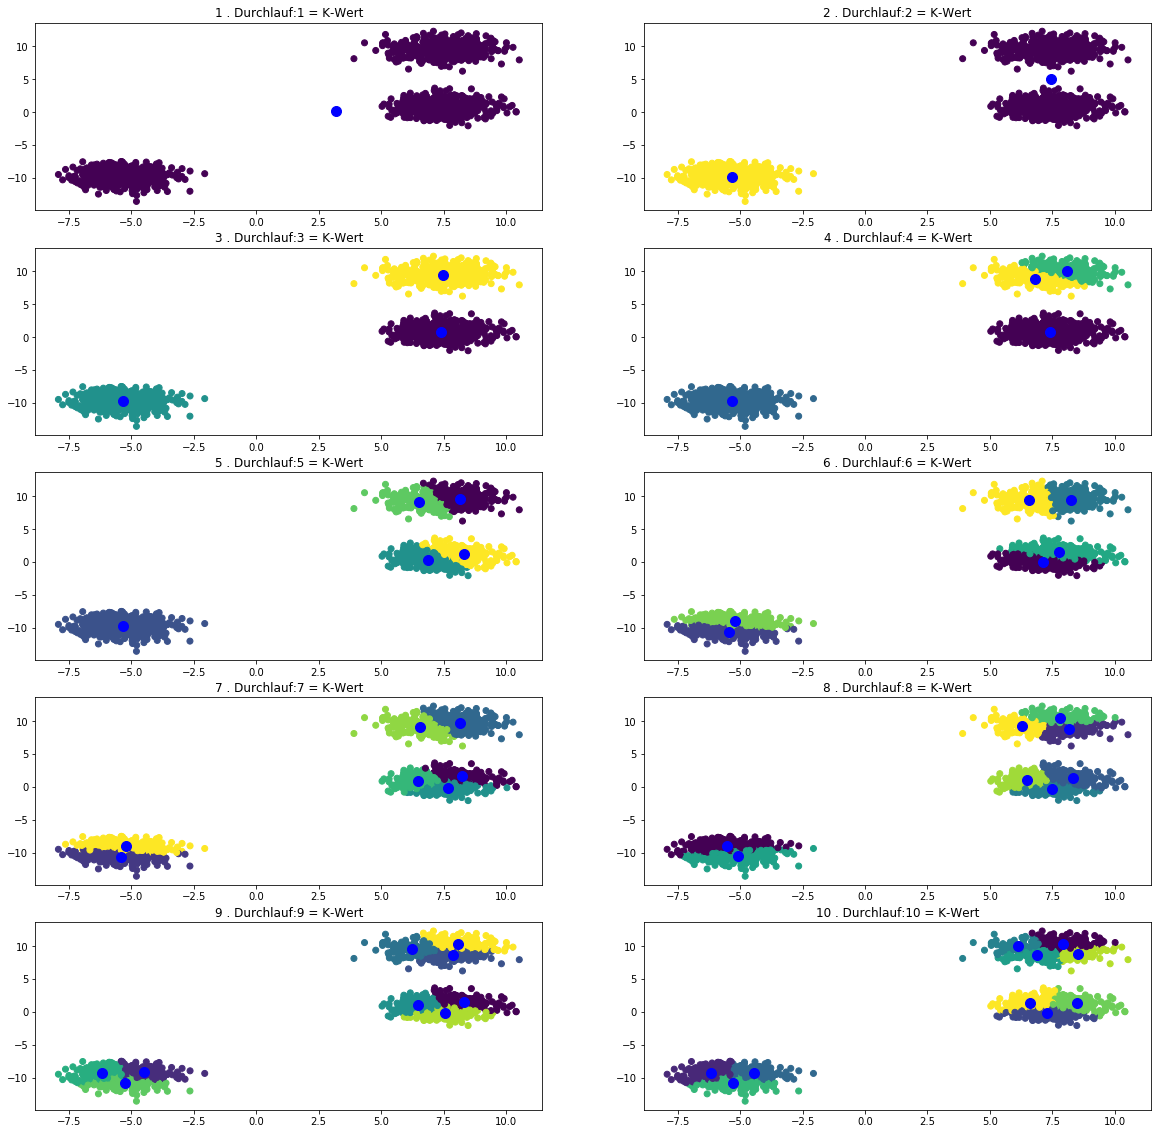

In [11]:
k_count = 1
c=d=0
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,20))
for i in range(10):
    kmeans = KMeans(n_clusters=k_count, max_iter=i+1)
    axes[c][d].title.set_text(f"{i+1} . Durchlauf:"f"{k_count} = K-Wert")
    kmeans.fit(C)
    centers_C=kmeans.cluster_centers_
    labels_C=kmeans.labels_ 
    #Ergebnis von Durchlauf printen
    axes[c][d].scatter(C[:, 0], C[:, 1], c=labels_C)
    axes[c][d].scatter(centers_C[:, 0], centers_C[:, 1], s=100, c='blue')
    d+=1
    k_count+=1
    #wenn subplot ende erreicht
    if d==2:
        c+=1
        d=0

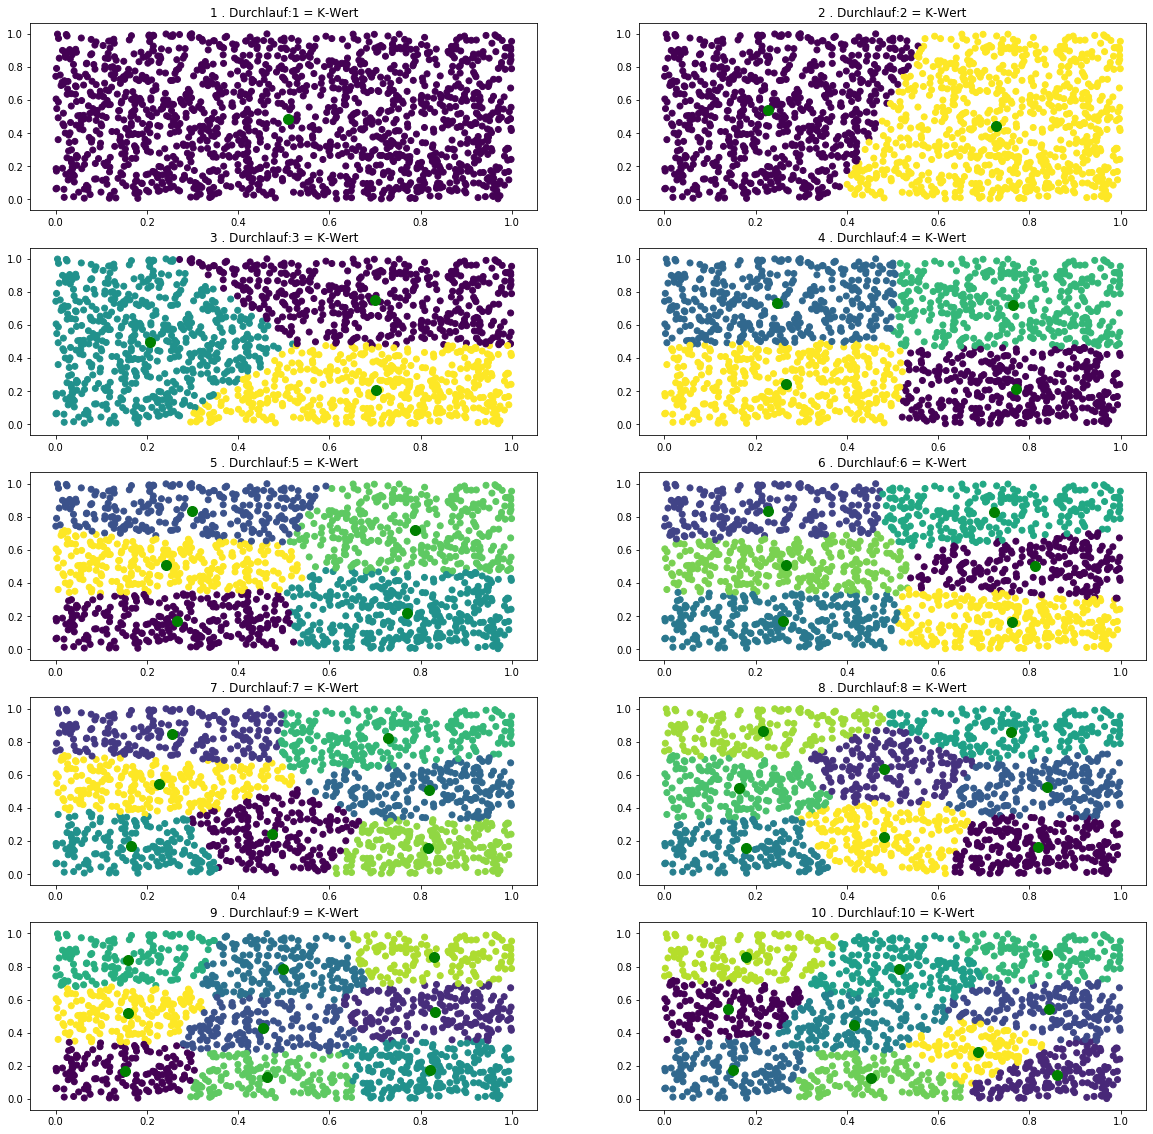

In [12]:
k_count = 1
c=d=0
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,20))
for i in range(10):
    kmeans = KMeans(n_clusters=k_count, max_iter=i+1)
    axes[c][d].title.set_text(f"{i+1} . Durchlauf:"f"{k_count} = K-Wert")
    kmeans.fit(D)
    centers_D=kmeans.cluster_centers_
    labels_D=kmeans.labels_ 
    #aktuellen durchlauf drucken
    axes[c][d].scatter(D[:, 0], D[:, 1], c=labels_D)
    axes[c][d].scatter(centers_D[:, 0], centers_D[:, 1], s=100, c='green')
    d+=1
    k_count+=1
    #wenn subplot ende erreicht
    if d==2:
        c+=1
        d=0

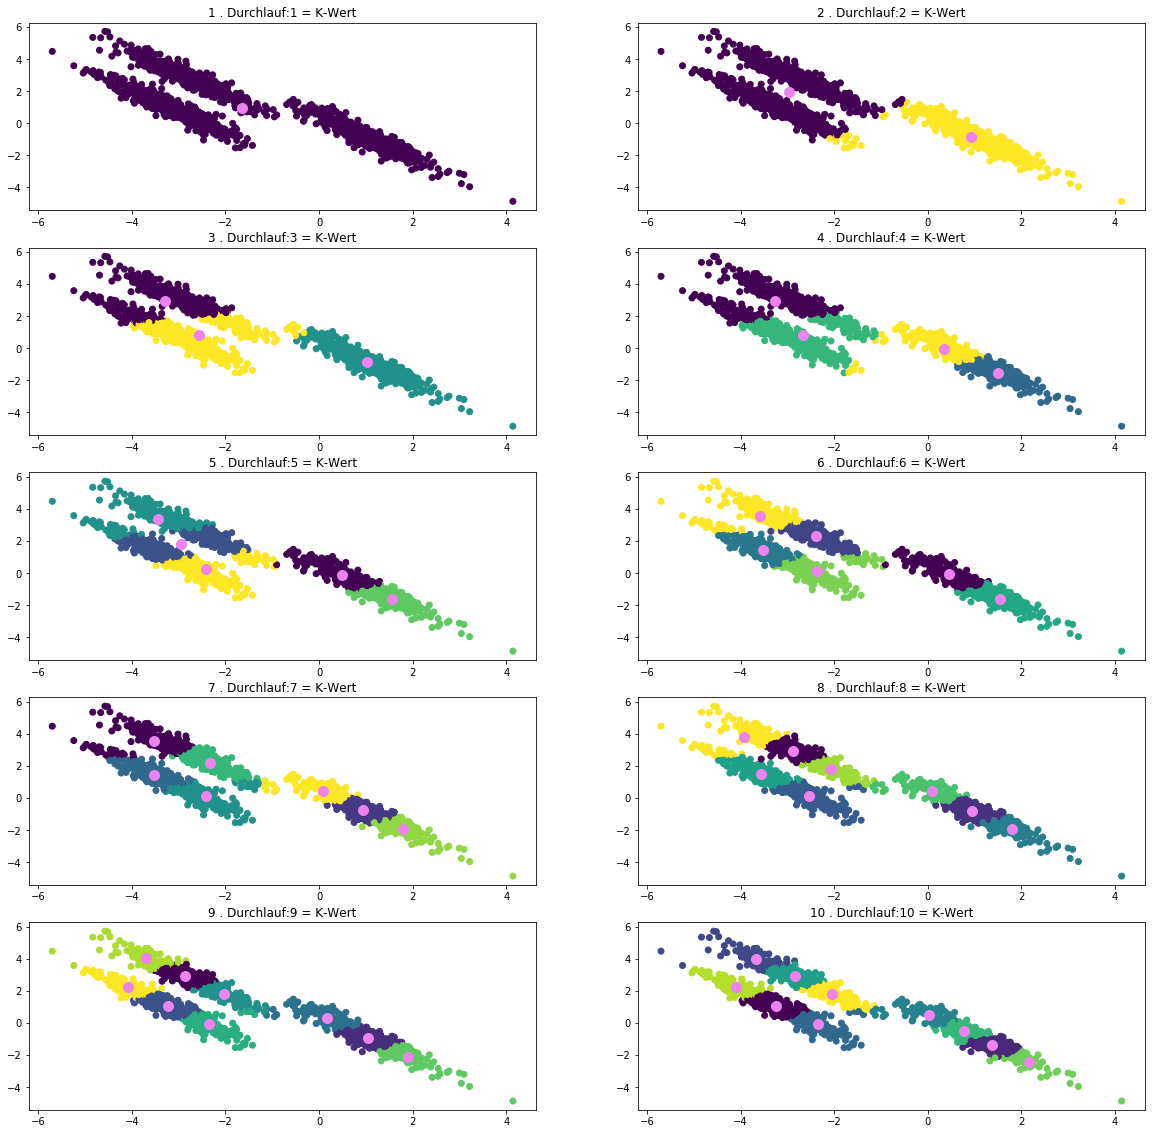

In [13]:
k_count = 1
c=d=0
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,20))
for i in range(10):
    kmeans = KMeans(n_clusters=k_count, max_iter=i+1)
    axes[c][d].title.set_text(f"{i+1} . Durchlauf:"f"{k_count} = K-Wert")
    kmeans.fit(E)
    centers_E=kmeans.cluster_centers_
    labels_E=kmeans.labels_ 
    #aktuellen durchlauf drucken
    axes[c][d].scatter(E[:, 0], E[:, 1], c=labels_E)
    axes[c][d].scatter(centers_E[:, 0], centers_E[:, 1], s=100, c='violet')
    d+=1
    k_count+=1
    #wenn subplot ende erreicht
    if d==2:
        c+=1
        d=0

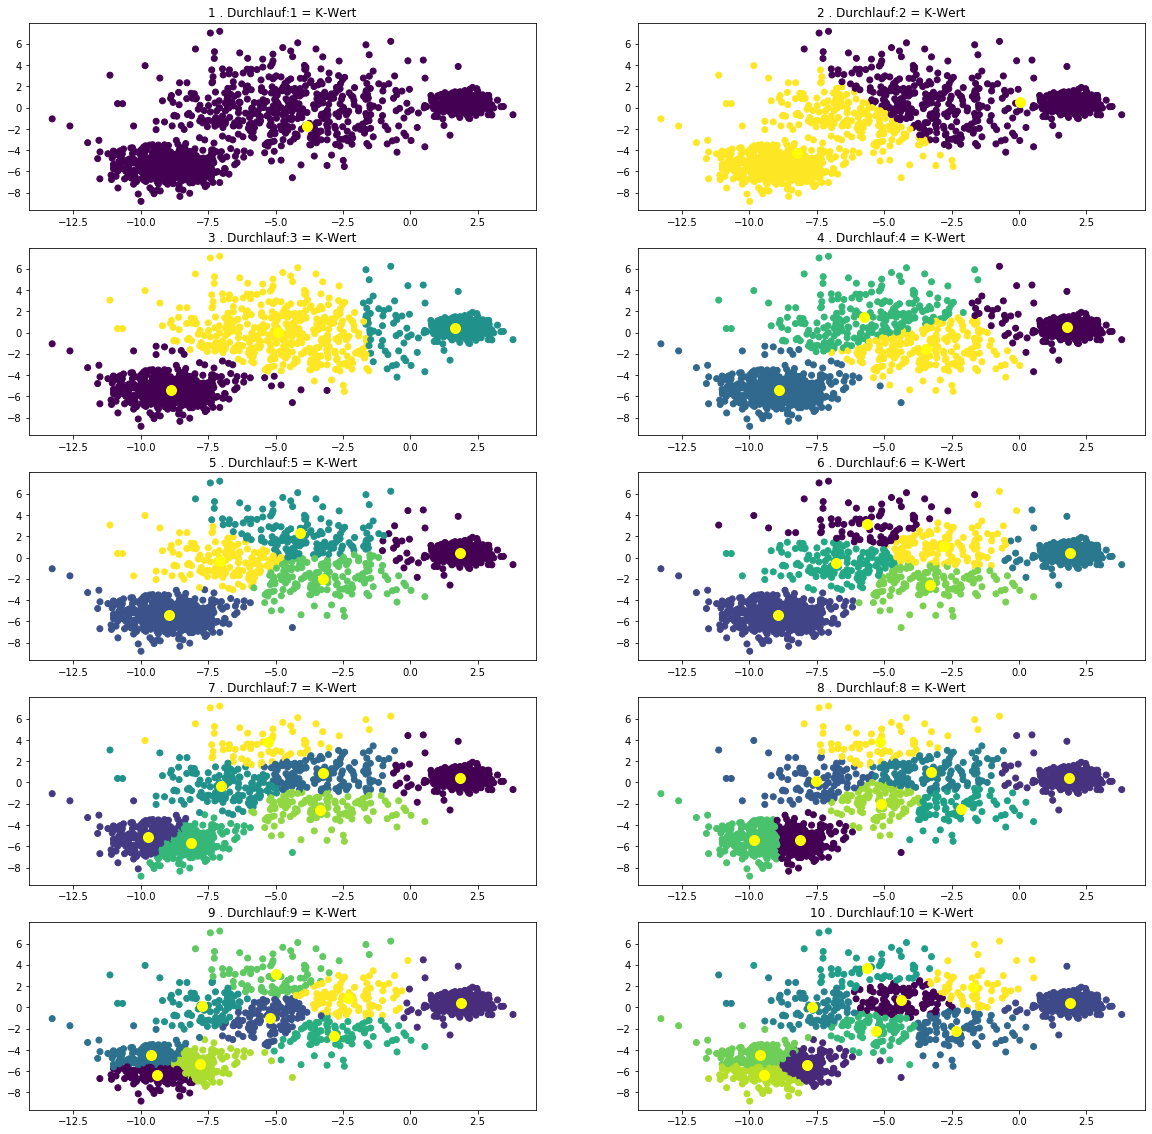

In [14]:
k_count = 1
c=d=0
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,20))
for i in range(10):
    kmeans = KMeans(n_clusters=k_count, max_iter=i+1)
    axes[c][d].title.set_text(f"{i+1} . Durchlauf:"f"{k_count} = K-Wert")
    kmeans.fit(F)
    kmeans.predict(F)
    centers_F=kmeans.cluster_centers_
    labels_F=kmeans.labels_ 
    #neue clusterung
    axes[c][d].scatter(F[:, 0], F[:, 1], c=labels_F)
    axes[c][d].scatter(centers_F[:, 0], centers_F[:, 1], s=100, c='yellow')
    d+=1
    k_count+=1
    #wenn subplot ende erreicht
    if d==2:
        c+=1
        d=0

# Lösung 2.3

In [15]:
A_kmeans = KMeans(n_clusters=2, init="k-means++").fit(A)
A_centers = A_kmeans.cluster_centers_

B_kmeans = KMeans(n_clusters=2, init="k-means++").fit(B)
B_centers = B_kmeans.cluster_centers_

C_kmeans = KMeans(n_clusters=2, init="k-means++").fit(C)
C_centers = C_kmeans.cluster_centers_

D_kmeans = KMeans(n_clusters=2, init="k-means++").fit(D)
D_centers = D_kmeans.cluster_centers_

E_kmeans = KMeans(n_clusters=2, init="k-means++").fit(E)
E_centers = E_kmeans.cluster_centers_

F_kmeans = KMeans(n_clusters=2, init="k-means++").fit(F)
F_centers = F_kmeans.cluster_centers_



<Figure size 432x288 with 0 Axes>

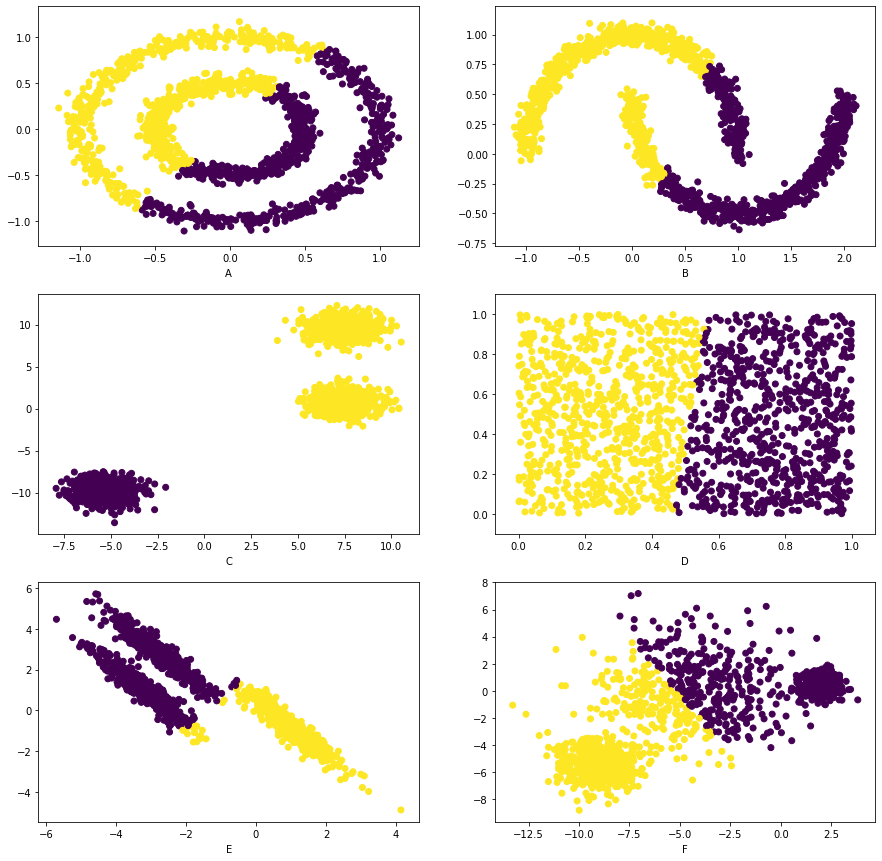

In [16]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2)

axes[0][0].scatter(A[:, 0], A[:, 1], c=A_kmeans.labels_)
axes[0][0].set_xlabel('A', labelpad = 5)

axes[0][1].scatter(B[:, 0], B[:, 1], c=B_kmeans.labels_)
axes[0][1].set_xlabel('B', labelpad = 5)

axes[1][0].scatter(C[:, 0], C[:, 1], c=C_kmeans.labels_)
axes[1][0].set_xlabel('C', labelpad = 5)

axes[1][1].scatter(D[:, 0], D[:, 1], c=D_kmeans.labels_)
axes[1][1].set_xlabel('D', labelpad = 5)

axes[2][0].scatter(E[:, 0], E[:, 1], c=E_kmeans.labels_)
axes[2][0].set_xlabel('E', labelpad = 5)

axes[2][1].scatter(F[:, 0], F[:, 1], c=F_kmeans.labels_)
axes[2][1].set_xlabel('F', labelpad = 5)

f.set_figheight(15)
f.set_figwidth(15)

plt.show()


## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN

A_DBSC = DBSCAN(eps=0.1, min_samples=2).fit(A)
B_DBSC = DBSCAN(eps=0.1, min_samples=2).fit(B)
C_DBSC = DBSCAN(eps=1, min_samples=2).fit(C)
D_DBSC = DBSCAN(eps=0.1, min_samples=2).fit(D)
E_DBSC = DBSCAN(eps=0.4, min_samples=4).fit(E)
F_DBSC = DBSCAN(eps=0.7, min_samples=2).fit(F)


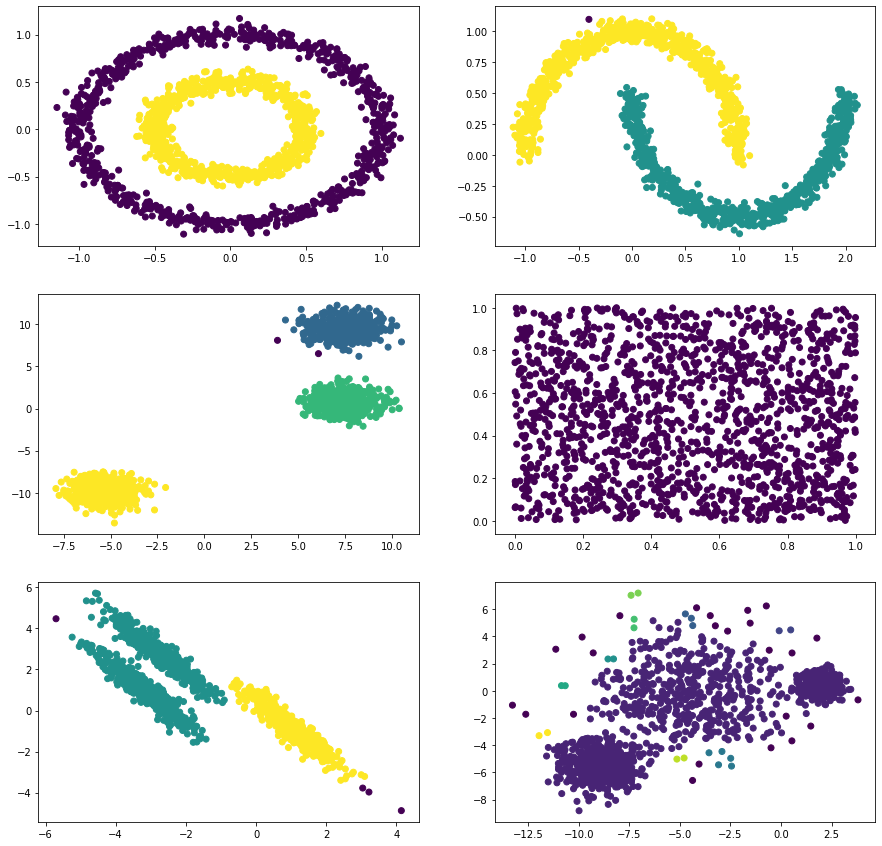

In [18]:
fig, axes = plt.subplots(3, 2,figsize=(15,15))

axes[0][0].scatter(A[:,0], A[:,1], c=A_DBSC.labels_)
axes[0][1].scatter(B[:,0], B[:,1], c=B_DBSC.labels_)
axes[1][0].scatter(C[:,0], C[:,1], c=C_DBSC.labels_)
axes[1][1].scatter(D[:,0], D[:,1], c=D_DBSC.labels_)
axes[2][0].scatter(E[:,0], E[:,1], c=E_DBSC.labels_)
axes[2][1].scatter(F[:,0], F[:,1], c=F_DBSC.labels_)